Description of Dataset Features:

This dataset includes various health-related measurements and demographic information.

Age: Recorded in 5-year intervals.

Height (cm): Measurement of an individual's height in centimeters.

Weight (kg): Measurement of an individual's weight in kilograms.

Waist (cm): Length of waist circumference.

Eyesight (left): Assessment of vision in the left eye.

Eyesight (right): Assessment of vision in the right eye.

Hearing (left): Evaluation of hearing ability in the left ear.

Hearing (right): Evaluation of hearing ability in the right ear.

Systolic: Measurement of systolic blood pressure.

Relaxation: Measurement of diastolic blood pressure.

Fasting Blood Sugar: Level of blood sugar after a period of fasting.

Cholesterol (Total): Total cholesterol levels.

Triglyceride: Measurement of triglyceride levels.

HDL (High-Density Lipoprotein): Measurement of high-density cholesterol levels.

LDL (Low-Density Lipoprotein): Measurement of low-density cholesterol levels.

Hemoglobin: Hemoglobin levels in the blood.

Urine Protein: Presence of protein in the urine.

Serum Creatinine: Measurement of serum creatinine levels.

AST (Aspartate Aminotransferase): Enzyme measurement related to liver function.

ALT (Alanine Aminotransferase): Enzyme measurement related to liver function.

GTP (Gamma-Glutamyl Transferase): Measurement of γ-GTP enzyme levels.

Dental Caries: Evaluation of dental caries or cavities.

Smoking: Smoking status of the individual.



#**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('/content/train_dataset.csv')
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


In [4]:
df_test = pd.read_csv('/content/test_dataset.csv')
df_test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,170,65,75.1,1.0,0.9,1,1,120,70,...,260,41,132,15.7,1,0.8,24,26,32,0
1,45,170,75,89.0,0.7,1.2,1,1,100,67,...,345,49,140,15.7,1,1.1,26,28,138,0
2,30,180,90,94.0,1.0,0.8,1,1,115,72,...,103,53,103,13.5,1,1.0,19,29,30,0
3,60,170,50,73.0,0.5,0.7,1,1,118,78,...,70,65,108,14.1,1,1.3,31,28,33,0
4,30,170,65,78.0,1.5,1.0,1,1,110,70,...,210,45,103,14.7,1,0.8,21,21,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,60,165,65,82.0,0.7,1.0,1,1,101,68,...,131,41,110,13.5,1,0.8,78,75,33,0
16704,60,155,70,93.0,0.8,1.0,1,1,134,70,...,259,53,60,13.9,1,0.7,19,28,28,1
16705,40,155,50,67.2,0.9,0.8,1,1,134,80,...,50,64,131,13.4,1,0.7,16,10,14,0
16706,35,165,70,76.1,1.0,1.0,1,1,114,68,...,43,74,118,14.3,1,1.2,19,28,30,1


#**Exploratory Analysis**

In [5]:
df.shape

(38984, 23)

In [6]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [7]:
df.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [8]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


<Axes: >

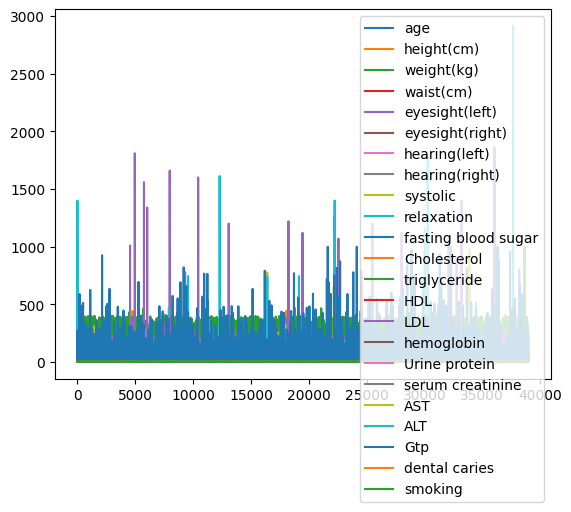

In [9]:
%matplotlib inline
df.plot()

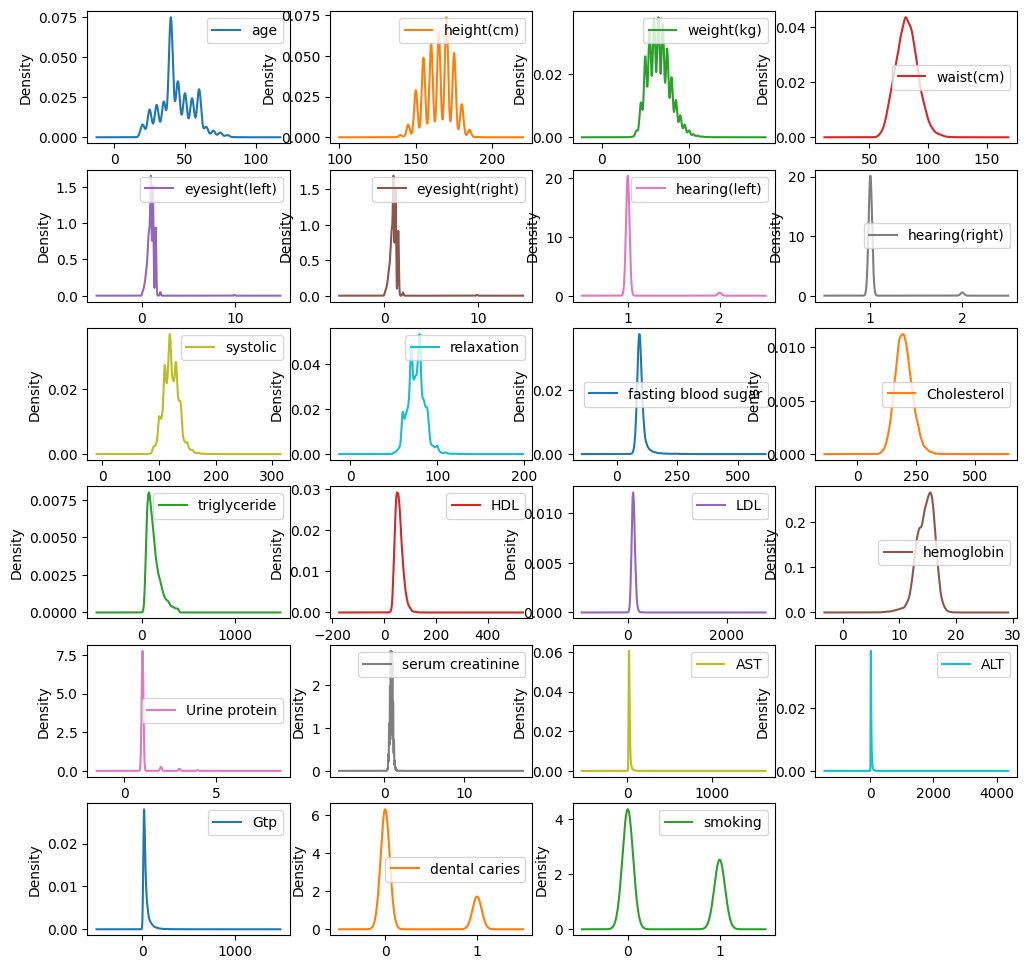

In [10]:
df.plot(kind='density', subplots=True, layout=(6, 4), figsize=(12, 12), sharex=False)
plt.show()

In [11]:
df['smoking'].value_counts()

0    24666
1    14318
Name: smoking, dtype: int64

In [12]:
corr_matrix = df.corr()
corr_matrix["smoking"].sort_values(ascending=False)

smoking                1.000000
hemoglobin             0.401206
height(cm)             0.394314
weight(kg)             0.299347
triglyceride           0.251057
Gtp                    0.240274
waist(cm)              0.223359
serum creatinine       0.212473
dental caries          0.107601
relaxation             0.103663
fasting blood sugar    0.099908
ALT                    0.098615
systolic               0.070176
eyesight(right)        0.064587
AST                    0.062834
eyesight(left)         0.059409
Urine protein          0.013653
hearing(right)        -0.018990
hearing(left)         -0.022077
Cholesterol           -0.027493
LDL                   -0.041627
age                   -0.166268
HDL                   -0.179509
Name: smoking, dtype: float64

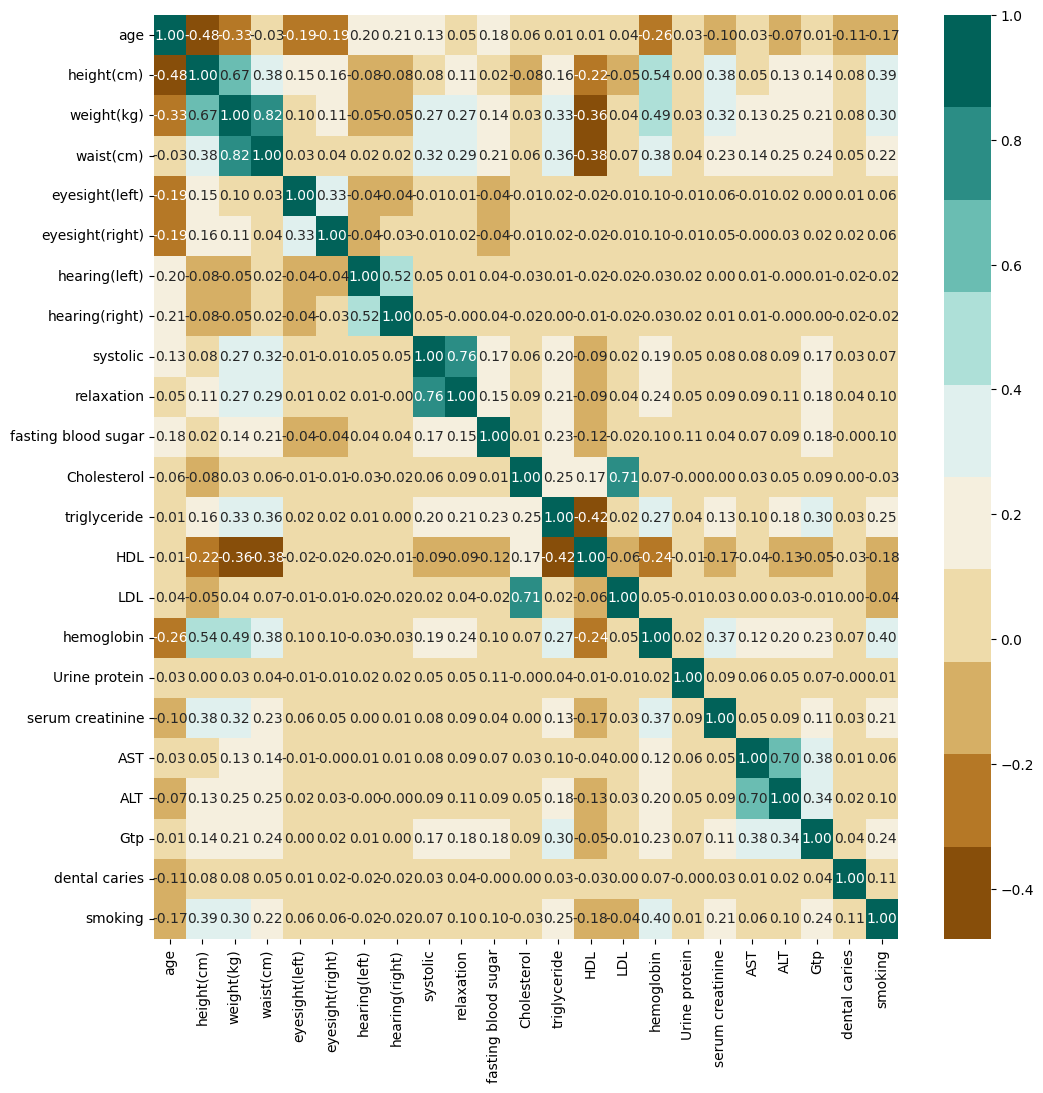

In [13]:
# Plot figsize
fig, ax = plt.subplots(figsize=(12, 12))
# Generate Color Map
colormap = sns.color_palette("BrBG", 10)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")

plt.show()

#**Model Training and Evaluation**

Rearranging Target column as first column

In [14]:
#Extract features and target variable
features = df[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
               'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
               'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
               'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
               'ALT', 'Gtp', 'dental caries']]
target = df['smoking']

# Rearrange columns with the target column as the first column
df = pd.concat([target, features], axis=1)

# Display the updated DataFrame
df.head()

,smoking,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,1,35,170,85,97.0,0.9,0.9,1,1,118,...,153,70,142,19.8,1,1.0,61,115,125,1
1,0,20,175,110,110.0,0.7,0.9,1,1,119,...,128,71,114,15.9,1,1.1,19,25,30,1
2,0,45,155,65,86.0,0.9,0.9,1,1,110,...,120,57,112,13.7,3,0.6,1090,1400,276,0
3,0,45,165,80,94.0,0.8,0.7,1,1,158,...,366,46,91,16.9,1,0.9,32,36,36,0
4,0,20,165,60,81.0,1.5,0.1,1,1,109,...,200,47,92,14.9,1,1.2,26,28,15,0


# **Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression

# Extract features and target variable
features = df[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
               'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
               'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
               'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
               'ALT', 'Gtp', 'dental caries']]
target = df['smoking']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Display predictions
Logisticpredictions_df = pd.DataFrame({'Actual_smoking': y_test, 'Predicted_smoking': predictions})
print(Logisticpredictions_df)

# Evaluate the logistic regression model using the predicted values
accuracy_logistic = accuracy_score(Logisticpredictions_df['Actual_smoking'], Logisticpredictions_df['Predicted_smoking'])
conf_matrix_logistic = confusion_matrix(Logisticpredictions_df['Actual_smoking'], Logisticpredictions_df['Predicted_smoking'])
classification_rep_logistic = classification_report(Logisticpredictions_df['Actual_smoking'], Logisticpredictions_df['Predicted_smoking'])

# Print the results for logistic regression
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Confusion Matrix:\n{conf_matrix_logistic}")
print(f"Classification Report:\n{classification_rep_logistic}")

       Actual_smoking  Predicted_smoking
22014               0                  1
8979                0                  0
9517                0                  1
9003                0                  0
33220               0                  0
...               ...                ...
34680               0                  0
26920               0                  0
26670               1                  1
16764               0                  0
11100               0                  0

[7797 rows x 2 columns]
Logistic Regression Model:
Accuracy: 0.7188662306015134
Confusion Matrix:
[[4158  817]
 [1375 1447]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      4975
           1       0.64      0.51      0.57      2822

    accuracy                           0.72      7797
   macro avg       0.70      0.67      0.68      7797
weighted avg       0.71      0.72      0.71      7797



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###AUC-ROC for Logistic Regression

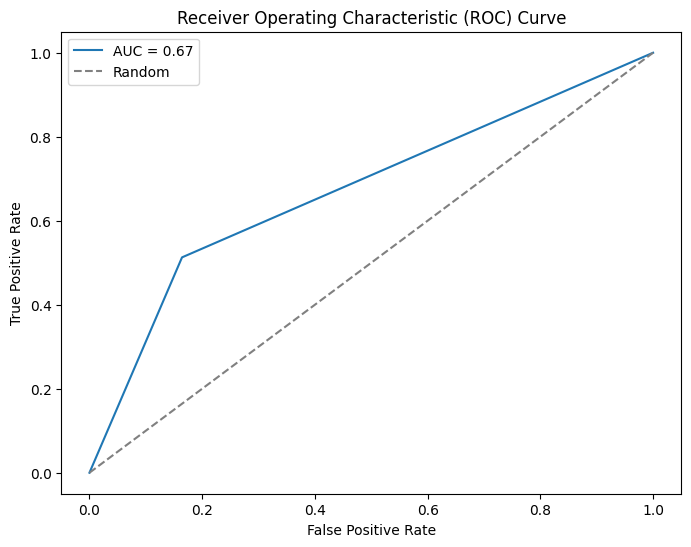

In [16]:
# Calculate AUC
auc = roc_auc_score(Logisticpredictions_df['Actual_smoking'], Logisticpredictions_df['Predicted_smoking'])

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(Logisticpredictions_df['Actual_smoking'], Logisticpredictions_df['Predicted_smoking'])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend()

# Show the plot
plt.show()

###Validation of Logistic Regression with Unseen Data

In [17]:
# Extract features from the unseen test set
X_test_unseen = df_test[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
                          'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
                          'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
                          'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
                          'ALT', 'Gtp', 'dental caries']]

# Make predictions on the unseen test set
predictions_unseen = model.predict(X_test_unseen)

# Display predictions for the unseen test set
Logisticpredictions_unseen_df = pd.DataFrame({'Predicted_smoking': predictions_unseen})
print(Logisticpredictions_unseen_df)

true_labels_unseen = Logisticpredictions_unseen_df['Predicted_smoking']

# Evaluate the logistic regression model on the unseen test set
accuracy_unseen = accuracy_score(true_labels_unseen, predictions_unseen)
conf_matrix_unseen = confusion_matrix(true_labels_unseen, predictions_unseen)
classification_rep_unseen = classification_report(true_labels_unseen, predictions_unseen)

# Print the results for the unseen test set
print("Evaluation on Unseen Data:")
print(f"Accuracy: {accuracy_unseen}")
print(f"Confusion Matrix:\n{conf_matrix_unseen}")
print(f"Classification Report:\n{classification_rep_unseen}")

       Predicted_smoking
0                      1
1                      1
2                      0
3                      0
4                      1
...                  ...
16703                  0
16704                  0
16705                  0
16706                  0
16707                  1

[16708 rows x 1 columns]
Evaluation on Unseen Data:
Accuracy: 1.0
Confusion Matrix:
[[11836     0]
 [    0  4872]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11836
           1       1.00      1.00      1.00      4872

    accuracy                           1.00     16708
   macro avg       1.00      1.00      1.00     16708
weighted avg       1.00      1.00      1.00     16708



#**Neural Network**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

features = df[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
               'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
               'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
               'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
               'ALT', 'Gtp', 'dental caries']]
target = df['smoking']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=X_train_scaled.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)
predictions_binary = (predictions > 0.5).astype(int)

X_test_new = df_test[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
                      'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
                      'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
                      'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
                      'ALT', 'Gtp', 'dental caries']]

# Standardize the new test set features
X_test_new_scaled = scaler.transform(X_test_new)

# Make predictions on the new test set
predictions_new = model.predict(X_test_new_scaled)
predictions_new_binary = (predictions_new > 0.5).astype(int)

# Display predictions
NNpredictions_df = pd.DataFrame({'Predicted_smoking': predictions_new_binary.flatten()})
print(NNpredictions_df)

#Evaluate the model
true_labels = NNpredictions_df['Predicted_smoking']

# Convert 'true_labels' to binary
true_labels_binary = (true_labels > 0.5).astype(int)

# Evaluate accuracy
accuracy_neural_network = accuracy_score(true_labels_binary, predictions_new_binary)

# Evaluate confusion matrix
conf_matrix = confusion_matrix(true_labels_binary, predictions_new_binary)

# Evaluate classification report
class_report = classification_report(true_labels_binary, predictions_new_binary)

# Print the results
print(f"Accuracy: {accuracy_neural_network}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Epoch 1/10
975/975 [==============================] - 2s 2ms/step - loss: 0.6070 - accuracy: 0.6811
Epoch 2/10
975/975 [==============================] - 2s 2ms/step - loss: 0.5215 - accuracy: 0.7166
Epoch 3/10
975/975 [==============================] - 2s 2ms/step - loss: 0.5116 - accuracy: 0.7207
Epoch 4/10
975/975 [==============================] - 2s 2ms/step - loss: 0.5101 - accuracy: 0.7225
Epoch 5/10
975/975 [==============================] - 2s 2ms/step - loss: 0.5097 - accuracy: 0.7223
Epoch 6/10
975/975 [==============================] - 2s 2ms/step - loss: 0.5095 - accuracy: 0.7216
Epoch 7/10
975/975 [==============================] - 2s 2ms/step - loss: 0.5094 - accuracy: 0.7239
Epoch 8/10
975/975 [==============================] - 2s 2ms/step - loss: 0.5094 - accuracy: 0.7228
Epoch 9/10
975/975 [==============================] - 2s 2ms/step - loss: 0.5093 - accuracy: 0.7233
Epoch 10/10
523/523 [==============================] - 1s 2ms/step
       Predicted_smoking
0       

###AUC-ROC for Neural Network

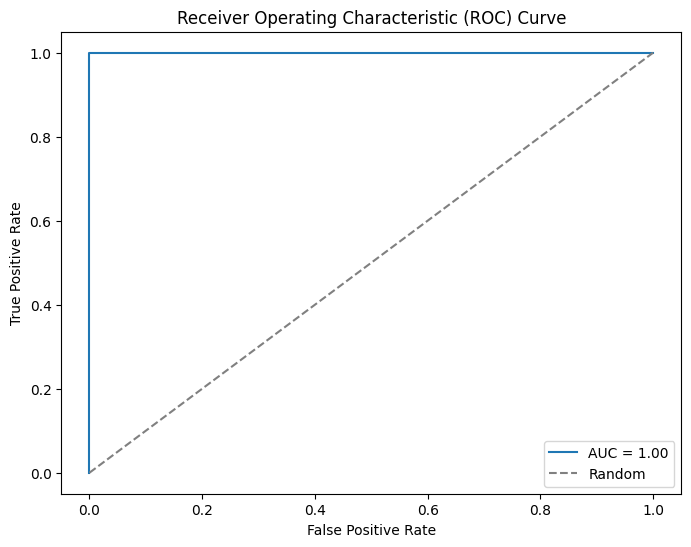

In [19]:
# Calculate AUC
auc = roc_auc_score(true_labels_binary, predictions_new_binary)

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(true_labels_binary, predictions_new_binary)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend()

# Show the plot
plt.show()

###Validation of Simple Neural Network with Unseen Data

In [20]:
X_test_new = df_test[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
                      'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
                      'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
                      'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
                      'ALT', 'Gtp', 'dental caries']]

# Standardize the new test set features
X_test_new_scaled = scaler.transform(X_test_new)

# Make predictions on the new test set
predictions_new = model.predict(X_test_new_scaled)
predictions_new_binary = (predictions_new > 0.5).astype(int)

true_labels_unseen = NNpredictions_df['Predicted_smoking']

# Convert 'true_labels_unseen' to binary
true_labels_unseen_binary = (true_labels_unseen > 0.5).astype(int)

# Evaluate accuracy on unseen data
accuracy_unseen = accuracy_score(true_labels_unseen_binary, predictions_new_binary)

# Evaluate confusion matrix on unseen data
conf_matrix_unseen = confusion_matrix(true_labels_unseen_binary, predictions_new_binary)

# Evaluate classification report on unseen data
class_report_unseen = classification_report(true_labels_unseen_binary, predictions_new_binary)

# Print the results for unseen data
print(f"Accuracy on Unseen Data: {accuracy_unseen}")
print(f"Confusion Matrix on Unseen Data:\n{conf_matrix_unseen}")
print(f"Classification Report on Unseen Data:\n{class_report_unseen}")

523/523 [==============================] - 1s 1ms/step
Accuracy on Unseen Data: 1.0
Confusion Matrix on Unseen Data:
[[11362     0]
 [    0  5346]]
Classification Report on Unseen Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11362
           1       1.00      1.00      1.00      5346

    accuracy                           1.00     16708
   macro avg       1.00      1.00      1.00     16708
weighted avg       1.00      1.00      1.00     16708



#**Radial Basis Function**

In [21]:
from sklearn.svm import SVC

features = df[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
               'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
               'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
               'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
               'ALT', 'Gtp', 'dental caries']]
target = df['smoking']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build an RBF SVM model
model = SVC(kernel='rbf', random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)
predictions_binary = (predictions > 0.5).astype(int)

# Display predictions
RBFpredictions_df = pd.DataFrame({'Predicted_smoking': predictions_binary})
print(RBFpredictions_df)

# Evaluate the model
accuracy_RBF = accuracy_score(y_test, predictions_binary)
conf_matrix = confusion_matrix(y_test, predictions_binary)
classification_rep = classification_report(y_test, predictions_binary)

# Print the results
print(f"Accuracy: {accuracy_RBF}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

      Predicted_smoking
0                     0
1                     0
2                     1
3                     0
4                     0
...                 ...
7792                  1
7793                  0
7794                  1
7795                  1
7796                  0

[7797 rows x 1 columns]
Accuracy: 0.7550339874310632
Confusion Matrix:
[[4020  955]
 [ 955 1867]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4975
           1       0.66      0.66      0.66      2822

    accuracy                           0.76      7797
   macro avg       0.73      0.73      0.73      7797
weighted avg       0.76      0.76      0.76      7797



###AUC-ROC for RBF

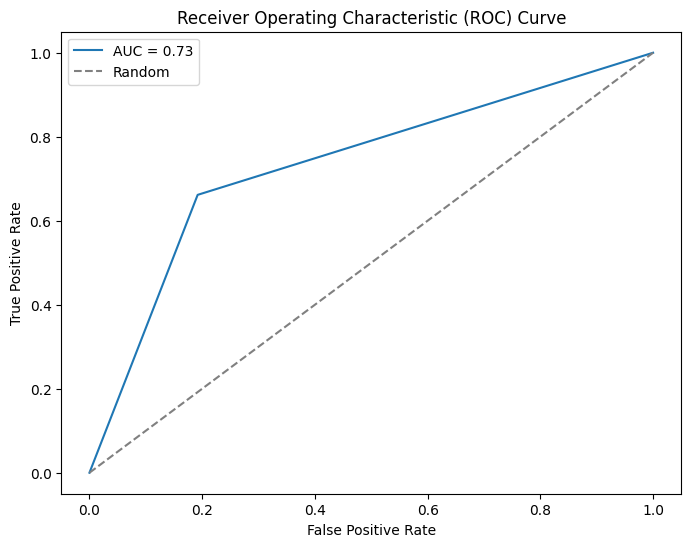

In [22]:
# Calculate AUC
auc = roc_auc_score(y_test, predictions_binary)

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, predictions_binary)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend()

# Show the plot
plt.show()

###Validation of RBF with Unseen Data

In [23]:
features_test = df_test[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
                          'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
                          'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
                          'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
                          'ALT', 'Gtp', 'dental caries']]
features_test_scaled = scaler.transform(features_test)

# Make predictions on the new test set
predictions_test = model.predict(features_test_scaled)
predictions_test_binary = (predictions_test > 0.5).astype(int)

# Display predictions on the new test set
RBFpredictions_test_df = pd.DataFrame({'Predicted_smoking': predictions_test_binary})
print(RBFpredictions_test_df)

# Evaluate the model on the new test set
accuracy_test = accuracy_score(RBFpredictions_test_df['Predicted_smoking'], predictions_test_binary)
conf_matrix_test = confusion_matrix(RBFpredictions_test_df['Predicted_smoking'], predictions_test_binary)
classification_rep_test = classification_report(RBFpredictions_test_df['Predicted_smoking'], predictions_test_binary)

# Print the results
print(f"Accuracy on the test set: {accuracy_test}")
print(f"Confusion Matrix:\n{conf_matrix_test}")
print(f"Classification Report:\n{classification_rep_test}")

       Predicted_smoking
0                      1
1                      1
2                      0
3                      0
4                      1
...                  ...
16703                  0
16704                  0
16705                  0
16706                  0
16707                  0

[16708 rows x 1 columns]
Accuracy on the test set: 1.0
Confusion Matrix:
[[10790     0]
 [    0  5918]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10790
           1       1.00      1.00      1.00      5918

    accuracy                           1.00     16708
   macro avg       1.00      1.00      1.00     16708
weighted avg       1.00      1.00      1.00     16708



#**Multi Layer Perceptron**

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

features = df[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
               'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
               'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
               'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
               'ALT', 'Gtp', 'dental caries']]
target = df['smoking']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=10, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
mlp_predictions = mlp_classifier.predict(X_test)

# Display the results
MLPPredictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': mlp_predictions})
print(mlp_predictions)

# Evaluate the model performance
accuracy_mlp = accuracy_score(y_test, mlp_predictions)
conf_matrix_mlp = confusion_matrix(y_test, mlp_predictions)
classification_rep_mlp = classification_report(y_test, mlp_predictions)

print(f'Test Accuracy (MLP): {accuracy_mlp:.4f}')
print('\nConfusion Matrix (MLP):')
print(conf_matrix_mlp)
print('\nClassification Report (MLP):')
print(classification_rep_mlp)

[0 0 1 ... 1 1 0]
Test Accuracy (MLP): 0.7514

Confusion Matrix (MLP):
[[3980  995]
 [ 943 1879]]

Classification Report (MLP):
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4975
           1       0.65      0.67      0.66      2822

    accuracy                           0.75      7797
   macro avg       0.73      0.73      0.73      7797
weighted avg       0.75      0.75      0.75      7797



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


###AUC-ROC for Multi Layer Perceptron

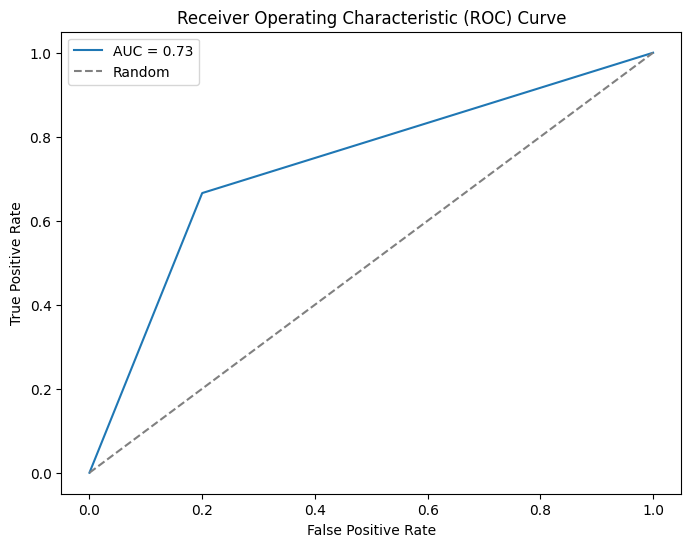

In [25]:
# Calculate AUC
auc = roc_auc_score(y_test, mlp_predictions)

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, mlp_predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend()

# Show the plot
plt.show()

###Validation of MLP with Unseen Data

In [26]:
# Extract features from the unseen test set
X_test_unseen = df_test[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
                          'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
                          'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
                          'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
                          'ALT', 'Gtp', 'dental caries']]

# Make predictions on the unseen test set
predictions_unseen = mlp_classifier.predict(X_test_unseen)
predictions_new_binary = (predictions_unseen > 0.5).astype(int)

# Display predictions for the unseen test set
MLPPredictions_df = pd.DataFrame({'Predicted_smoking': predictions_new_binary.flatten()})
print(MLPPredictions_df)

true_labels_unseen = MLPPredictions_df['Predicted_smoking']
# Convert 'true_labels_unseen' to binary
true_labels_unseen_binary = (true_labels_unseen > 0.5).astype(int)

# Evaluate the logistic regression model on the unseen test set
accuracy_unseen = accuracy_score(true_labels_unseen_binary, predictions_new_binary)
conf_matrix_unseen = confusion_matrix(true_labels_unseen_binary, predictions_new_binary)
classification_rep_unseen = classification_report(true_labels_unseen_binary, predictions_new_binary)

# Print the results for the unseen test set
print("Evaluation on Unseen Data:")
print(f"Accuracy: {accuracy_unseen}")
print(f"Confusion Matrix:\n{conf_matrix_unseen}")
print(f"Classification Report:\n{classification_rep_unseen}")

       Predicted_smoking
0                      1
1                      1
2                      1
3                      1
4                      1
...                  ...
16703                  1
16704                  1
16705                  1
16706                  1
16707                  1

[16708 rows x 1 columns]
Evaluation on Unseen Data:
Accuracy: 1.0
Confusion Matrix:
[[    7     0]
 [    0 16701]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00     16701

    accuracy                           1.00     16708
   macro avg       1.00      1.00      1.00     16708
weighted avg       1.00      1.00      1.00     16708



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


#Feed Forward Neural Network

In [27]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

features = df[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
               'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
               'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
               'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
               'ALT', 'Gtp', 'dental caries']]
target = df['smoking']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a feedforward neural network model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)
predictions_binary = (predictions > 0.5).astype(int)

# Display predictions
FFN_predictions_df = pd.DataFrame({'Predicted_smoking': predictions_binary.flatten()})
print(FFN_predictions_df)

# Evaluate the model
accuracy_FFN = accuracy_score(y_test, predictions_binary)
conf_matrix_FFN = confusion_matrix(y_test, predictions_binary)
classification_rep_FFN = classification_report(y_test, predictions_binary)

# Print the results
print(f"Accuracy: {accuracy_FFN}")
print(f"Confusion Matrix:\n{conf_matrix_FFN}")
print(f"Classification Report:\n{classification_rep_FFN}")


Epoch 1/10
780/780 [==============================] - 3s 2ms/step - loss: 0.5120 - accuracy: 0.7182 - val_loss: 0.4898 - val_accuracy: 0.7377
Epoch 2/10
780/780 [==============================] - 2s 2ms/step - loss: 0.4861 - accuracy: 0.7445 - val_loss: 0.4841 - val_accuracy: 0.7443
Epoch 3/10
780/780 [==============================] - 2s 2ms/step - loss: 0.4802 - accuracy: 0.7483 - val_loss: 0.4800 - val_accuracy: 0.7458
Epoch 4/10
780/780 [==============================] - 2s 2ms/step - loss: 0.4756 - accuracy: 0.7534 - val_loss: 0.4817 - val_accuracy: 0.7435
Epoch 5/10
780/780 [==============================] - 2s 2ms/step - loss: 0.4730 - accuracy: 0.7544 - val_loss: 0.4781 - val_accuracy: 0.7493
Epoch 6/10
780/780 [==============================] - 3s 3ms/step - loss: 0.4709 - accuracy: 0.7557 - val_loss: 0.4782 - val_accuracy: 0.7470
Epoch 7/10
780/780 [==============================] - 2s 3ms/step - loss: 0.4690 - accuracy: 0.7561 - val_loss: 0.4789 - val_accuracy: 0.7462
Epoch 

###AUC-ROC for FNN

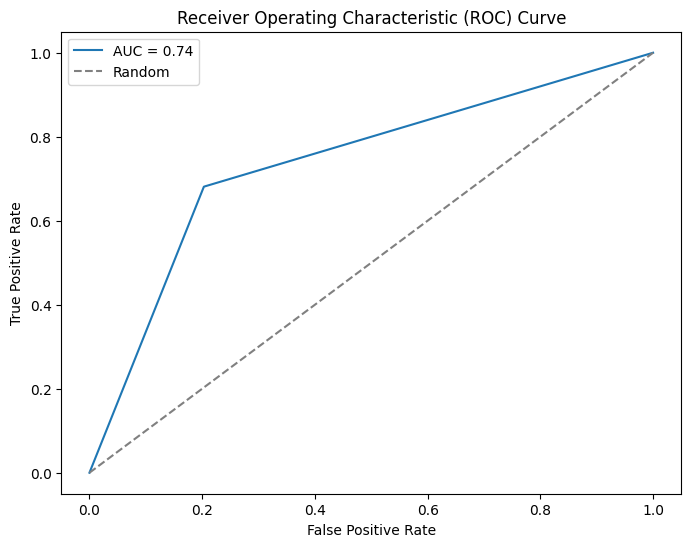

In [28]:
# Calculate AUC
auc = roc_auc_score(y_test, predictions_binary)

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, predictions_binary)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend()

# Show the plot
plt.show()

###Validation of FNN with Unseen Data

In [29]:
# Make predictions on the unseen test set
predictions_unseen = model.predict(X_test_unseen)

# Convert predictions to binary
predictions_unseen_binary = (predictions_unseen > 0.5).astype(int)

# Display predictions for the unseen test set
FFN_predictions_df = pd.DataFrame({'Predicted_smoking': predictions_unseen_binary.flatten()})
print(FFN_predictions_df)

true_labels_unseen = FFN_predictions_df['Predicted_smoking']

# Evaluate the logistic regression model on the unseen test set
accuracy_unseen = accuracy_score(true_labels_unseen, predictions_unseen_binary)
conf_matrix_unseen = confusion_matrix(true_labels_unseen, predictions_unseen_binary)
classification_rep_unseen = classification_report(true_labels_unseen, predictions_unseen_binary)

# Print the results for the unseen test set
print("Evaluation on Unseen Data:")
print(f"Accuracy: {accuracy_unseen}")
print(f"Confusion Matrix:\n{conf_matrix_unseen}")
print(f"Classification Report:\n{classification_rep_unseen}")

523/523 [==============================] - 1s 1ms/step
       Predicted_smoking
0                      1
1                      1
2                      1
3                      1
4                      1
...                  ...
16703                  1
16704                  1
16705                  1
16706                  1
16707                  1

[16708 rows x 1 columns]
Evaluation on Unseen Data:
Accuracy: 1.0
Confusion Matrix:
[[ 1043     0]
 [    0 15665]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1043
           1       1.00      1.00      1.00     15665

    accuracy                           1.00     16708
   macro avg       1.00      1.00      1.00     16708
weighted avg       1.00      1.00      1.00     16708



##**Comparison of Training Models**

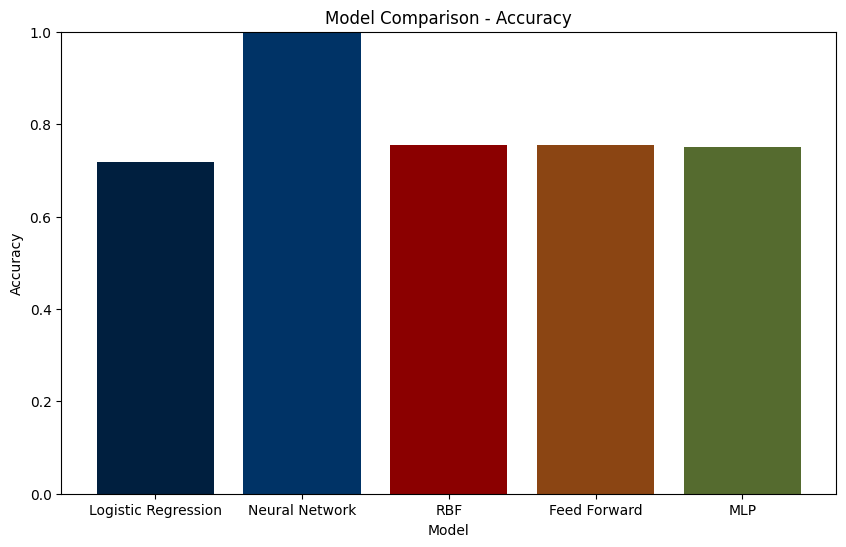

In [30]:
# Accuracy values for each model
accuracies = [accuracy_logistic, accuracy_neural_network, accuracy_RBF, accuracy_FFN, accuracy_mlp]

# Labels for each model
models = ['Logistic Regression', 'Neural Network', 'RBF', 'Feed Forward', 'MLP']

# Dark color palette
colors = ['#001f3f', '#003366', '#8B0000', '#8B4513', '#556B2F']

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.ylim(0, 1)  # Set y-axis limit to match the accuracy range (0 to 1)
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Add text labels with accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', color='white', fontsize=10)

plt.show()